## **DISTRIBUCIÓN DE CATEGORÍAS**
---

##### El objetivo de este análisis es poder **visualizar** la **distribución** de las **distintas** **categorías** en ambos datasets y poder **unificarlas en una tabla maestra**, permitiendo realizar análisis conjuntos y construir un esquema relacional que incluya categorías comunes.

##### Para poder lograr este objetivo primeramente se realizará una pequeña **normalización en los datos.**

- ##### **Dataset Yelp:**

    - ``business_id:`` Identificador único de un negocio en Yelp.

    - ``lista_categorias:`` Lista de categorías asignadas a cada negocio. Cada business_id puede tener múltiples categorías.

- ##### **Dataset Google:**

    - ``gmap_id:`` Identificador único de un sitio en Google Maps.

    - ``category:`` Categoría asignada a un sitio en Google. Cada sitio tiene una sola categoría por fila, aunque un gmap_id puede repetirse si tiene múltiples categorías.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download("stopwords")
nltk.download("punkt")

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### **CARGA DE DATOS - Normalización**

In [96]:
categorias_yelp = pd.read_parquet('C:\DYNAMO\PFinal\Proyecto_final\Datos\yelp\categories_business_yelp_todavia_nombres.parquet')
categorias_yelp

,business_id,lista_categorias
0,Pns2l4eNsfO8kk83dixA6A,Doctors
0,Pns2l4eNsfO8kk83dixA6A,Traditional Chinese Medicine
0,Pns2l4eNsfO8kk83dixA6A,Naturopathic/Holistic
0,Pns2l4eNsfO8kk83dixA6A,Acupuncture
0,Pns2l4eNsfO8kk83dixA6A,Health & Medical
...,...,...
150344,mtGm22y5c2UHNXDFAjaPNw,Bikes
150345,jV_XOycEzSlTx-65W906pg,Beauty & Spas
150345,jV_XOycEzSlTx-65W906pg,Permanent Makeup
150345,jV_XOycEzSlTx-65W906pg,Piercing


In [3]:
categorias_google = pd.read_parquet('C:\DYNAMO\PFinal\Proyecto_final\Datos\google\categories_sitios_google_todavia_nombres.parquet')
categorias_google

,gmap_id,category
0,0x88f16e41928ff687:0x883dad4fd048e8f8,Pharmacy
1,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,Textile exporter
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Korean restaurant
3,0x80c2c89923b27a41:0x32041559418d447,Fabric store
4,0x80c2c632f933b073:0xc31785961fe826a6,Fabric store
...,...,...
3025006,0x89c6c74f43a49b55:0x6be6995921c58b12,Seafood restaurant
3025007,0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,Chevrolet dealer
3025008,0x89da6b9ce832726f:0xbd0d3630f1e3b42e,Veterinarian
3025009,0x88d9e872a9e39f3d:0x5de29f50507e5d73,Animal feed store


#### **ELIMINACIÓN DE NULLS Y DUPLICADOS**

In [97]:
# Verificar duplicados
duplicados_yelp = categorias_yelp.duplicated().sum()
duplicados_google = categorias_google.duplicated().sum()

# Verificar valores nulos
valores_nulos_yelp = categorias_yelp.isnull().sum()
valores_nulos_google = categorias_google.isnull().sum()

# Resultados
print(f'Duplicados en Yelp: {duplicados_yelp}\n')
print(f'Duplicados en Google: {duplicados_google}\n')

print('Valores nulos en Yelp:')
print(valores_nulos_yelp, '\n')

print('Valores nulos en Google:')
print(valores_nulos_google, '\n')

Duplicados en Yelp: 33

Duplicados en Google: 0

Valores nulos en Yelp:
business_id         0
lista_categorias    0
dtype: int64 

Valores nulos en Google:
gmap_id        0
category       0
category_id    0
dtype: int64 



In [98]:
# Filtrar las filas con categorías vacías
filas_vacias_yelp = categorias_yelp[categorias_yelp['lista_categorias'] == '']

# Contar cuántas filas están vacías
conteo_vacio = filas_vacias_yelp.shape[0]

print(f"Cantidad de filas con categorías vacías: {conteo_vacio}")


Cantidad de filas con categorías vacías: 103


In [100]:
# Filtrar las filas con categorías vacías
filas_vacias_google = categorias_google[categorias_google['category'] == '']

# Contar cuántas filas están vacías
conteo_vacio_g = filas_vacias_google.shape[0]

print(f"Cantidad de filas con categorías vacías: {conteo_vacio_g}")


Cantidad de filas con categorías vacías: 0


In [101]:
# Eliminar filas con categorías vacías
categorias_yelp = categorias_yelp[categorias_yelp['lista_categorias'] != '']

# Verificar que se eliminaron las filas vacías
print("Filas restantes en categorías de Yelp:")
print(categorias_yelp.shape[0])  # Cantidad de filas restantes


Filas restantes en categorías de Yelp:
668592


In [102]:
# Manejo de duplicados en Yelp
categorias_yelp = categorias_yelp.drop_duplicates()

In [103]:
# Manejo de valores nulos en Google
categorias_google = categorias_google.dropna(subset=['category'])

In [105]:
# 1. Recuento de categorías únicas
categorias_yelp_unicas = categorias_yelp['lista_categorias'].nunique()
print(f"Cantidad de categorías únicas en Yelp: {categorias_yelp_unicas}")

# Conteo de categorías únicas en Google
categorias_google_unicas = categorias_google['category'].nunique()
print(f"Número de categorías únicas en Google: {categorias_google_unicas}")

Cantidad de categorías únicas en Yelp: 2454
Número de categorías únicas en Google: 4470


### **CONSIDERACIONES** 

##### A pesar de que hay una gran cantidad de filas en ambos datasets, solo hay un número limitado de categorías en cada uno. La presencia de tantas filas en comparación con las categorías únicas indica que muchos negocios comparten las mismas categorías.

- ##### **En Yelp: 2454 categorías únicas.**
##### **Múltiples Negocios por Categoría:** Dado que cada ``business_id`` puede estar asociado a múltiples categorías, significa que varias empresas pueden compartir la misma categoría. Por ejemplo, diferentes restaurantes pueden ser clasificados bajo **"food"**, **"breakfast"**, lo que resulta en una cantidad significativa de filas para una categoría dada.
- ##### **En Google: 4470 categorías únicas.**
##### **Múltiples Categorías por Localización (gmap_id):** En Google Maps, cada ``gmap_id`` puede repetirse con diferentes categorías. Esto significa que un solo negocio puede ser clasificado de múltiples maneras, lo que refleja la versatilidad en cómo los negocios son percibidos o categorizados.

---

### **PRIMER PASO:** 
### **GRÁFICO DE CATEGORIAS TOP TEN (FRECUENCIA)**

##### Se visualizan las categorías que aparecen con mayor frecuencia tanto en el dataset de google como en el de yelp. El objetivo es poder identificar las categoría que son populares entre los usuarios. Esto nos permitirá influir en las decisiones o análisis posteriores, como identificar áreas de mercado saturadas o en crecimiento.

#### **Dominancia de ``Restaurants:``**

##### En Yelp, la categoría "Restaurants" lidera con más de 35.000 menciones, lo cual es significativo.
##### En Google, la categoría "Restaurant" tiene una cantidad aún mayor cerca de 100.000 menciones lo que sugiere que, en general, la búsqueda de restaurantes es mucho más común en Google.

#### **Categorías Similares:**

##### Ambos datasets muestran categorías relacionadas con la comida (``"Food"`` en Yelp y ``"Restaurant"`` en Google), indicando que hay un enfoque fuerte en la **gastronomía**.
##### Las **categorías de belleza** también aparecen en ambos, como ``"Beauty & Spas"`` en Yelp y ``"Beauty salon"`` y ``"Nail salon"`` en Google, lo que sugiere una demanda en estos servicios.

#### **Servicios Automotrices y Estaciones de Servicio en Google:**

##### Google incluye categorías como ``"Auto repair shop"`` y ``"Gas station"``, que no aparecen en Yelp. Esto puede reflejar la naturaleza de los negocios que los usuarios buscan en cada plataforma.

#### **Variedad en los Tipos de Negocios:**

##### Google tiene una gama más amplia de categorías en su top 10, mientras que Yelp parece estar más centrado en servicios relacionados con la comida y el entretenimiento.

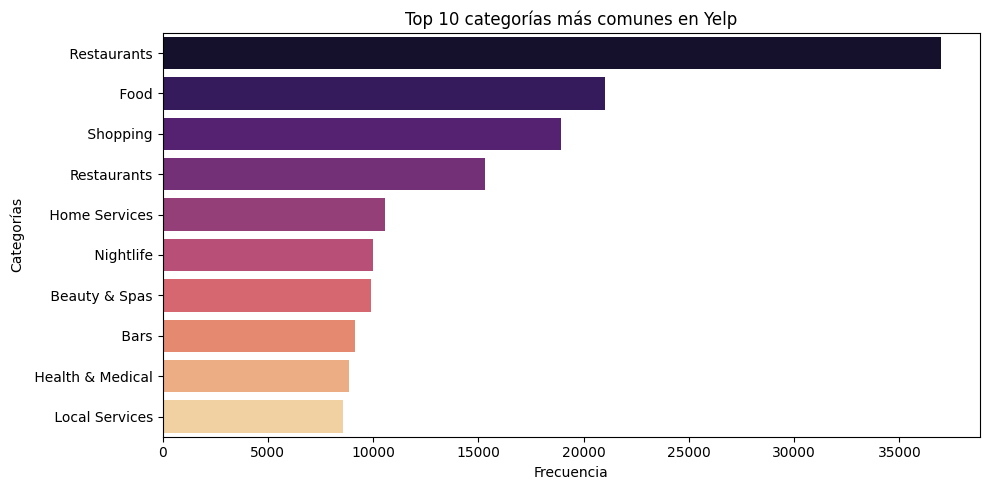

In [112]:
# Frecuencia de las categorías más comunes en Yelp
top_yelp = categorias_yelp['lista_categorias'].value_counts().head(10).sort_values(ascending=False)

# Crear gráfico de barras horizontal para Yelp
plt.figure(figsize=(10, 5))
sns.barplot(x=top_yelp.values, y=top_yelp.index, palette='magma')
plt.title('Top 10 categorías más comunes en Yelp')
plt.xlabel('Frecuencia')
plt.ylabel('Categorías')

# Visualización
plt.tight_layout()
plt.show()

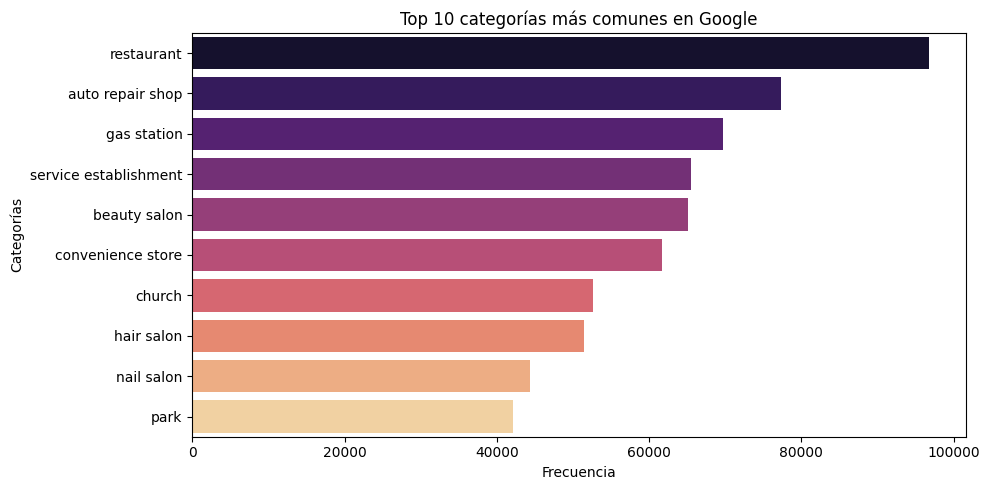

In [114]:
# Frecuencia de las categorías más comunes en Google
top_google = categorias_google['category'].value_counts().head(10).sort_values(ascending=False)

# Crear gráfico de barras horizontal para Google
plt.figure(figsize=(10, 5))
sns.barplot(x=top_google.values, y=top_google.index, palette='magma')
plt.title('Top 10 categorías más comunes en Google')
plt.xlabel('Frecuencia')
plt.ylabel('Categorías')

# Visualizción
plt.tight_layout()
plt.show()

### **CONCLUSIONES**

#### **Tendencias de Consumo:** 

- ##### La alta frecuencia de la categoría ``Restaurants`` respalda nuestro enfoque en analizar **restaurantes** y **hoteles**, destacando su relevancia en el mercado actual.

#### **Segmentación y Personalización:**
- ##### La diversidad de categorías en los datasets subraya la importancia de un sistema de recomendación personalizado, que ayude a los usuarios a descubrir nuevos lugares basados en sus preferencias.

#### **Impacto de las Reseñas:**
- ##### Las reseñas son cruciales para la toma de decisiones de los consumidores; analizar estos datos permitirá a las empresas optimizar sus servicios y mejorar su reputación.

#### **Adaptación Continua:**
- ##### La naturaleza dinámica de las reseñas implica que nuestras herramientas deben actualizarse en tiempo real, facilitando la adaptación a cambios en el comportamiento del consumidor.

---

### **SEGUNDO PASO:**
### **UNIFICACIÓN DE CATEGORÍAS (Yelp y Google)**

##### Se procede a agrupar las categorías a segmentos más generales para obtener una visión más amplia y clara de todas las categorías presentes, lo que nos ayudará a tomar decisiones informadas y mejor fundamentadas.

#### **Unificar y Normalizar Categorías**

##### A continuación, concatenamos las categorías de ambas tablas y eliminamos duplicados para crear una tabla maestra de categorías y se aplica un proceso de normalización que incluye la eliminación de espacios en blanco y la conversión a minúsculas.

##### También se aplica la normalización en los datasets originales.

In [26]:
# Paso 1: Unificar categorías y crear maestro de categorías
# Concatenar ambas tablas de categorías
categorias_unificadas = pd.concat([categorias_yelp['lista_categorias'], categorias_google['category']]).unique()

# Crear tabla maestra de categorías
categories = pd.DataFrame(categorias_unificadas, columns=['category'])
categories['category_id'] = categories.index + 1  # autoincremental


# Normalizar y limpiar categorías
def normalizar_categoria(cat):
    """Normaliza la categoría eliminando espacios y convirtiendo a minúsculas."""
    return cat.strip().lower()  # Remover espacios y convertir a minúsculas

# Aplicar normalización
categories['category'] = categories['category'].apply(normalizar_categoria)

# Eliminar duplicados tras la normalización
categories = categories.drop_duplicates(subset=['category']).reset_index(drop=True)

# Reasignar el category_id después de la limpieza
categories['category_id'] = categories.index + 1

# Guardar el CSV normalizado
categories.to_csv('categories_normalized.csv', index=False)


#### **Creación de Diccionario para mapear Ids**

##### Se procede a normalizar las categorías en las tablas originales para asegurar consistencia y se crea un diccionario que vincula las categorías a sus respectivos ``category_id``. Para ello se mapea y asigna el ``category_id`` a las categorías en **Yelp**.

##### De manera similar, asignamos el ``category_id`` a las categorías en **Google**. Finalmente se renombran las columnas para que sean más descriptivas y claras.

In [31]:
# Cargar las tablas originales y el maestro de categorías
# categorias_yelp = pd.read_parquet('Proyecto_final/Datos/yelp/categories_business_yelp_todavia_nombres.parquet')
# categorias_google = pd.read_parquet('Proyecto_final/Datos/google/categories_sitios_google_todavia_nombres.parquet')
categories = pd.read_csv('C:/DYNAMO/PFinal/Proyecto_final/notebooks/EDA/categories_normalized.csv')

# Paso 2: Normalizar y limpiar categorías en las tablas originales
categorias_yelp['lista_categorias'] = categorias_yelp['lista_categorias'].apply(normalizar_categoria)
categorias_google['category'] = categorias_google['category'].apply(normalizar_categoria)

# Paso 3: Crear un diccionario para mapear categorías a category_id
category_dict = pd.Series(categories.category_id.values, index=categories.category).to_dict()

# Paso 4: Mapear y asignar category_id en Yelp
categorias_yelp['category_id'] = categorias_yelp['lista_categorias'].map(category_dict)

# Paso 5: Mapear y asignar category_id en Google
categorias_google['category_id'] = categorias_google['category'].map(category_dict)

# Paso 6: Mantener solo las columnas necesarias
yelp_normalizado = categorias_yelp[['business_id', 'category_id']]
google_normalizado = categorias_google[['gmap_id', 'category_id']]

# Paso 7: Renombrar las columnas para mayor claridad
yelp_normalizado.rename(columns={'category_id': 'category_id_yelp'}, inplace=True)
google_normalizado.rename(columns={'category_id': 'category_id_google'}, inplace=True)

# Paso 8: Guardar las tablas normalizadas
yelp_normalizado.to_parquet('yelp_normalizado.parquet', index=False)
google_normalizado.to_parquet('google_normalizado.parquet', index=False)

In [41]:
print(categorias_yelp['category_id'].isnull().sum(), "categorías no mapeadas en Yelp.")
print(categorias_google['category_id'].isnull().sum(), "categorías no mapeadas en Google.")


0 categorías no mapeadas en Yelp.
0 categorías no mapeadas en Google.


#### **Verificación de registros en los conjuntos de datos normalizados** 

#### **Yelp**

#### A continuación, se identifican los duplicados en el conjunto de datos. Se busca por combinaciones de business_id y category_id_yelp, ya que estas son claves relevantes para detectar duplicaciones significativas.

In [16]:
categories = pd.read_csv('C:/DYNAMO/PFinal/Proyecto_final/notebooks/EDA/categories_normalized.csv')

In [2]:
yelp_normalizado = pd.read_parquet('yelp_normalizado.parquet')

#### Los ids se han cargado como floats, se los convierte a enteros.

In [9]:
yelp_normalizado['category_id_yelp'] = yelp_normalizado['category_id_yelp'].fillna(0).astype(int)

In [10]:
yelp_normalizado.head(50)

,business_id,category_id_yelp
0,Pns2l4eNsfO8kk83dixA6A,1
1,Pns2l4eNsfO8kk83dixA6A,2
2,Pns2l4eNsfO8kk83dixA6A,3
3,Pns2l4eNsfO8kk83dixA6A,4
4,Pns2l4eNsfO8kk83dixA6A,5
5,Pns2l4eNsfO8kk83dixA6A,6
6,mpf3x-BjTdTEA3yCZrAYPw,7
7,mpf3x-BjTdTEA3yCZrAYPw,8
8,mpf3x-BjTdTEA3yCZrAYPw,9
9,mpf3x-BjTdTEA3yCZrAYPw,10


#### **Duplicados Encontrados:** 
#### Se han identificado múltiples registros con el mismo business_id y category_id_yelp, indicando que un mismo negocio puede estar asociado a la misma categoría más de una vez.

#### Los duplicados están asociados con la categoría de "gas stations" id = 171 (según el archivo de categorías maestra)

In [17]:
duplicates_yelp = yelp_normalizado[yelp_normalizado.duplicated(subset=['business_id', 'category_id_yelp'])]
print(duplicates_yelp)


                   business_id  category_id_yelp
15731   5wnGMB8tXhNvGcbhPJeeVw               171
182363  60A570zht69eAj3Md81nsQ               171
266310  YLLWDhNYfP1ocOHC5KWBOQ               171
327462  JPmd9szvz_YI8_LtcwixFw               171
394359  91gDFsfejFglVwdQWnkOpg               171
402228  -Ot1Qa0V3wNVUroZmItMyQ               171
452669  zqAPDoI34MDtNjvCWe3WKA               171
534635  oRY9axuwOQSN4HbTu7obtg               171
628422  XwqwayHSA_TJDnk-13AyAw               171
651164  fBNAR1lquwEEqruuR16UqQ               171


In [52]:
category_info = categories[categories['category_id'] == 171]
print(category_info)


         category  category_id
170  gas stations          171


#### **Google**

#### A continuación, se identifican los duplicados en el conjunto de datos. 

In [49]:
google_normalizado = pd.read_parquet('google_normalizado.parquet')

In [50]:
google_normalizado.head(50)

,gmap_id,category_id_google
0,0x88f16e41928ff687:0x883dad4fd048e8f8,269
1,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,1313
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,1314
3,0x80c2c89923b27a41:0x32041559418d447,1315
4,0x80c2c632f933b073:0xc31785961fe826a6,1315
5,0x80c2cf163db6bc89:0x219484e2edbcfa41,1315
6,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,1316
7,0x87ec238afdd8837b:0x2f43f2b12142bff5,1317
8,0x87ec238afdd8837b:0x2f43f2b12142bff5,1318
9,0x87ec235c54d25b31:0x3b75fb5facc602f,1319


#### **Múltiples Categorías por Negocio:**

Se encontró que un solo ``gmap_id`` puede estar asociado con múltiples ``category_id_google``, lo que indica que un negocio puede clasificarse en varias categorías.
Un ejemplo de esto es que un negocio puede estar etiquetado como "restaurante", "comida rápida" y "servicio de entrega".
Frecuencia de Categorías:

Se realizaron conteos sobre el número de categorías asociadas a cada gmap_id. Algunos negocios tienen un número significativo de categorías:
Ejemplo de gmap_id con más categorías:

``0x89c24484b823fed3:0x74f6329f85c4f381`` tiene 32 categorías.

``0x878da684ff9e47d9:0x8879f6718354b2f8`` tiene 23 categorías.

Los duplicados identificados se deben a la naturaleza de múltiples categorías por negocio. 

In [54]:
# Verificar duplicados solo por gmap_id
duplicados_gmap = google_normalizado[google_normalizado.duplicated(subset=['gmap_id'], keep=False)]
print(duplicados_gmap)


                                       gmap_id  category_id_google
7        0x87ec238afdd8837b:0x2f43f2b12142bff5                1317
8        0x87ec238afdd8837b:0x2f43f2b12142bff5                1318
9         0x87ec235c54d25b31:0x3b75fb5facc602f                1319
10        0x87ec235c54d25b31:0x3b75fb5facc602f                1320
11       0x87ee85ac3cb23b4d:0x4cd1435fddc046b1                1321
...                                        ...                 ...
6211312  0x88d9e749a61cd6a5:0x7396cf8e8dadf8bf                2637
6211313  0x88d9e749a61cd6a5:0x7396cf8e8dadf8bf                1390
6211317  0x89c6c74f43a49b55:0x6be6995921c58b12                3034
6211318  0x89c6c74f43a49b55:0x6be6995921c58b12                3801
6211319  0x89c6c74f43a49b55:0x6be6995921c58b12                1618

[4447528 rows x 2 columns]


In [55]:
# Verificar duplicados solo por category_id_google
duplicados_categoria = google_normalizado[google_normalizado.duplicated(subset=['category_id_google'], keep=False)]
print(duplicados_categoria)

                                       gmap_id  category_id_google
0        0x88f16e41928ff687:0x883dad4fd048e8f8                 269
1        0x80c2c98c0e3c16fd:0x29ec8a728764fdf9                1313
2        0x80c2c778e3b73d33:0xbdc58662a4a97d49                1314
3         0x80c2c89923b27a41:0x32041559418d447                1315
4        0x80c2c632f933b073:0xc31785961fe826a6                1315
...                                        ...                 ...
6211319  0x89c6c74f43a49b55:0x6be6995921c58b12                1618
6211320  0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc                2023
6211321  0x89da6b9ce832726f:0xbd0d3630f1e3b42e                2159
6211322  0x88d9e872a9e39f3d:0x5de29f50507e5d73                2331
6211323  0x54956b3944b1654d:0x7797cead9a485c22                1664

[6211089 rows x 2 columns]


#### Duplicados por ``gmap_id``: Se han identificado múltiples registros con el mismo gmap_id, lo que indica que una misma ubicación puede tener registros duplicados.

#### Duplicados por ``category_id_google``: También se han encontrado duplicados en la categoría asociada a los gmap_id, lo que sugiere que varias ubicaciones pueden compartir categorías comunes.

#### **Conteo de Categorías Únicas:** El número de categorías únicas por ``gmap_id`` muestra la diversidad de categorías asociadas a cada ubicación, con algunos gmap_id teniendo hasta 32 categorías diferentes.

In [57]:
# Contar categorías únicas por gmap_id
categoria_count = google_normalizado.groupby('gmap_id')['category_id_google'].nunique().reset_index()
categoria_count.columns = ['gmap_id', 'num_categories']

# Mostrar algunos resultados
print(categoria_count.sort_values(by='num_categories', ascending=False).head())


                                       gmap_id  num_categories
2537066  0x89c24484b823fed3:0x74f6329f85c4f381              32
1105201  0x878da684ff9e47d9:0x8879f6718354b2f8              23
2610611  0x89c28801576a92a1:0xe8183528656d5f08              22
48527    0x52b13956184253f9:0x17abc3bcffbb8273              19
989353   0x872b6f70ced0c877:0x86325275c1a5a1fe              18


---
### **TERCER PASO:**
### **CONSOLIDACIÓN DE CATEGORÍAS:**
- #### Se crea una categoría general agrupando categorías relacionadas en una sola.

#### Se procede a agrupar categorías relacionadas en una sola (ej. "bar", "restaurant", "resto") para obtener una visión clara de las categorías presentes en los datos, lo que facilitará la toma de decisiones informadas.

#### Para esto se utiliza **NLTK** para procesar el texto, eliminar información inncesearia y realizar un recuento de palabras para identificar las más frecuentes.

#### Con esto se definirá grupos generales y se asignaran las categorías basándose en coincidencias de palabras clave.



In [89]:
# Obtenemos la lista de stop words en inglés
palabras_excluidas = set(stopwords.words("english")).union({"&"})

# Cargar el archivo
try:
    categorias = pd.read_csv('categories_normalized.csv')
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Tokenizamos la columna "categories_id" y filtramos las stop words
tokens = categorias["category"].apply(word_tokenize)
tokens_sin_exclusiones = tokens.apply(lambda x: [palabra for palabra in x if palabra not in palabras_excluidas])

# Contamos la frecuencia de cada palabra
frecuencia_palabras = Counter(palabra for sublista in tokens_sin_exclusiones for palabra in sublista)

# Ordenamos las palabras por frecuencia
palabras_ordenadas = sorted(frecuencia_palabras.items(), key=lambda x: x[1], reverse=True)


In [68]:
# Guardamos en un archivo CSV para luego realizar la agrupación
ruta_archivo = r'C:/DYNAMO/PFinal/Proyecto_final/notebooks/EDA/palabras_frecuentes.csv'  # Ruta especificada

df_palabras_ordenadas = pd.DataFrame(
    palabras_ordenadas, columns=["Palabra", "Frecuencia"]
)
df_palabras_ordenadas.to_csv(ruta_archivo, index=False)

print(f"Las palabras ordenadas se han guardado en {ruta_archivo}.")


Las palabras ordenadas se han guardado en C:/DYNAMO/PFinal/Proyecto_final/notebooks/EDA/palabras_frecuentes.csv.


In [18]:
frecuencia = pd.read_csv('palabras_frecuentes.csv')
frecuencia

,Palabra,Frecuencia
0,service,366
1,store,366
2,restaurant,298
3,supplier,246
4,shop,182
...,...,...
3458,zealand,1
3459,offal,1
3460,asturian,1
3461,cigarette,1


#### **Observaciones de las palabras más frecuentes**
##### **Palabras Dominantes:**

- ##### ``service`` y ``store`` son las palabras más frecuentes, lo cual indica que hay muchas categorías relacionadas con servicios y establecimientos. Estos términos podrían ser buenos puntos de partida para agrupar categorías relacionadas en un solo grupo general.

- ##### Palabras como ``restaurant``, ``supplier``, ``shop`` y ``school`` también tienen una alta frecuencia, lo cual indica que estos tipos de negocios tienen muchas subcategorías.

##### **Consideraciones para agrupar:**

- ##### Términos como ``service``, ``services``, ``repair``, y ``equipment`` podrían ser agrupados bajo una categoría general de **servicios**.

- ##### ``Restaurant``, ``food``, ``store``, ``shop`` podrían formar parte de un grupo relacionado con el **comercio de alimentos y gastronomía.**

- ##### Palabras como ``club``, ``center``, ``agency``, ``office`` podrían indicar agrupamientos en torno a negocios de **entretenimiento**, **deporte** o **centros de servicio**.

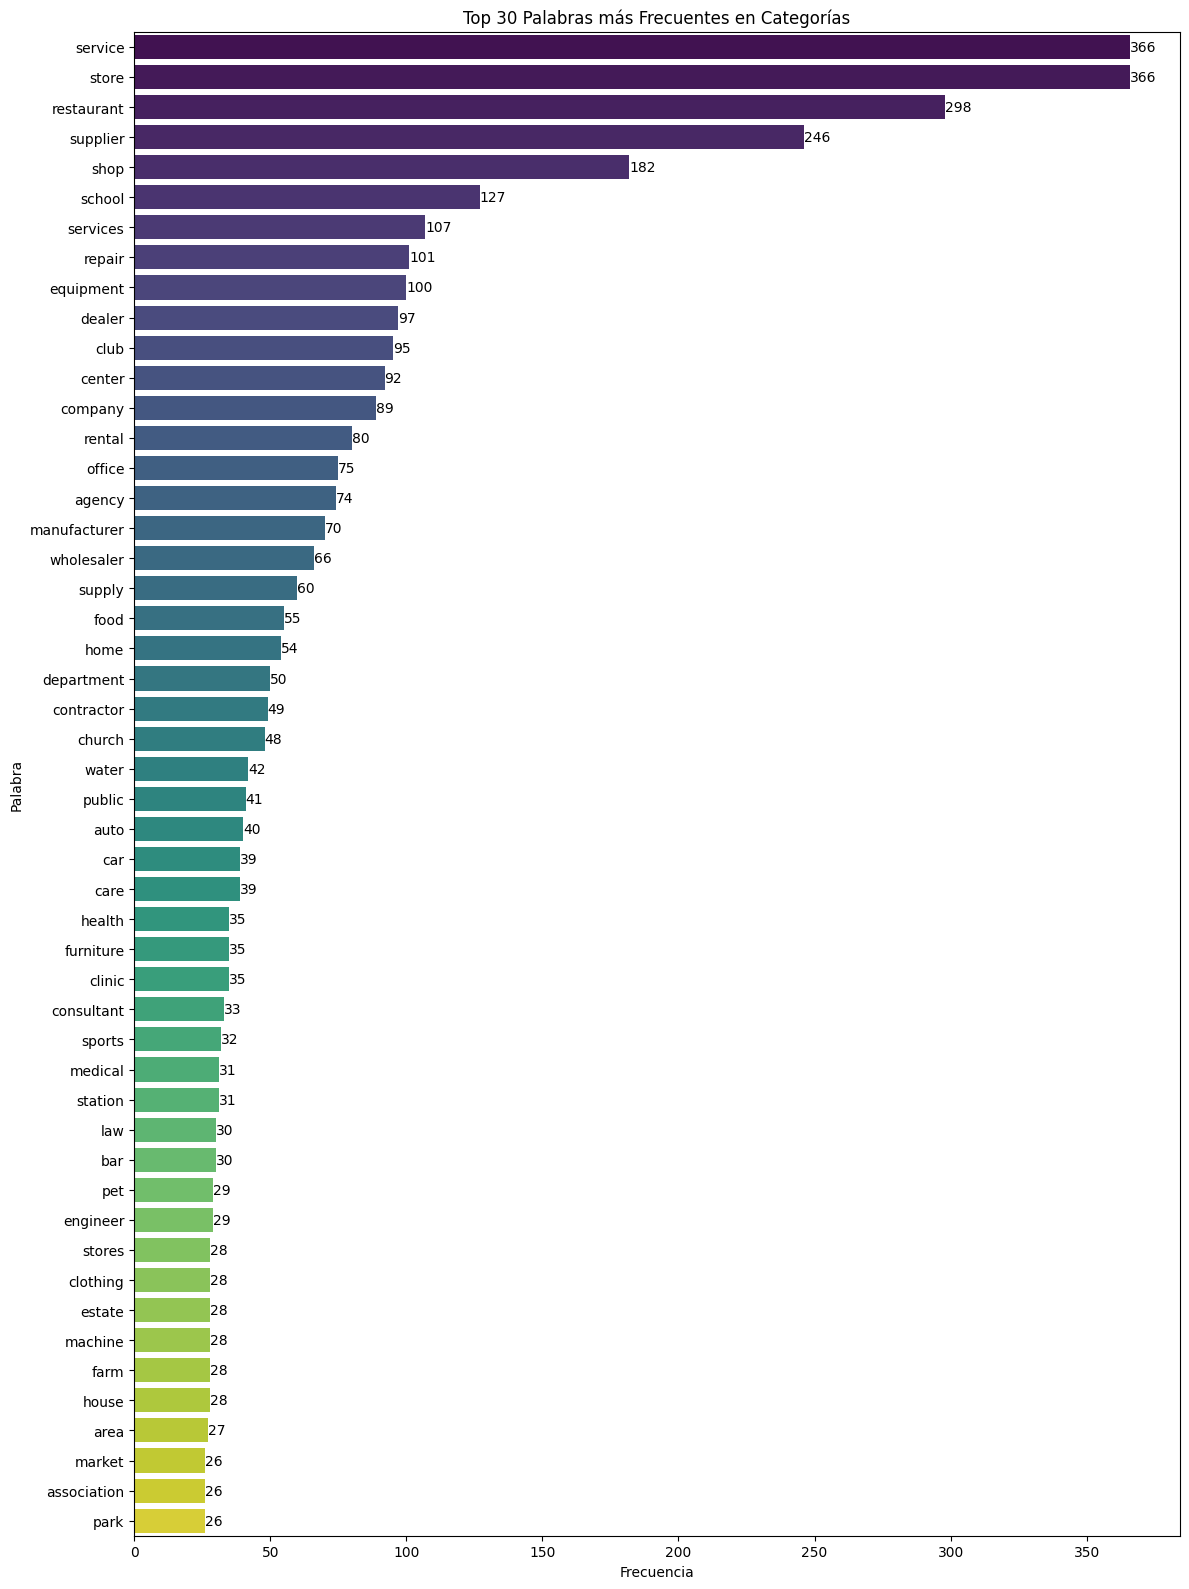

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo de palabras frecuentes
frecuentes = pd.read_csv('palabras_frecuentes.csv')

# Filtrar para obtener solo las 30 palabras más frecuentes
top_30_frecuentes = frecuentes.head(50)

# Crear un gráfico de barras horizontal
plt.figure(figsize=(12, 16))
barplot = sns.barplot(y='Palabra', x='Frecuencia', data=top_30_frecuentes, palette='viridis')

# Añadir etiquetas con los valores de frecuencia en cada barra
for index, value in enumerate(top_30_frecuentes['Frecuencia']):
    barplot.text(value, index, f'{value}', va='center', ha='left')

# Configuraciones del gráfico
plt.title('Top 30 Palabras más Frecuentes en Categorías')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### **CONSIDERACIONES** 

##### Este análisis basado en frecuencias es un buen avance con las palabras clave, y simplifica la agrupación de las categorías más comunes reduciendo el trabajo manual. A su vez, también resulta ser menos efectivo para las categorías menos comunes o aquellas que no tienen términos obvios en común.

##### Para solucionar esto, se opta por el siguiente enfoque obteniendo un equilibrio perfecto entre **precisión** y **eficiencia**, aprovechando el análisis de las frecuencias y utilizando como apoyo técnicas de NLP para manejar las categorías menos obvias. 


- ##### **Definir los Grupos Iniciales:** Utilizando los términos más frecuentes identificados se agruparan en categorías generales.
- ##### **Aplicar Matriz TF-IDF y Clustering:** Con las categorías restantes, aplicaremos técnicas de NLP para agruparlas automáticamente, asegurándonos de cubrir todas las categorías.



#### **DICCIONARIO DE AGRUPACIÓN**

##### Se crea el diccionario donde cada palabra se agrupa bajo una categoría general siguiendo el análisis basado en frecuencias y luego se aplica la agrupación a *categories_normalized* (tabla maestra de categorías).

- **Servicios Generales** (`service, services, repair, company, contractor, consultant, agency`): Palabras relacionadas con servicios ofrecidos por empresas.

- **Comercio y Tiendas** (``store, shop, supplier, wholesaler, department, market, store, clothing``): Palabras relacionadas con establecimientos comerciales y distribución.
- **Alimentos y Bebidas** (``restaurant, bar, food``): Abarca todo lo relacionado con la gastronomía y la venta de alimentos.
- **Educación y Entretenimiento** (``school, club, center, sports, park``): Agrupa palabras relacionadas con educación y actividades recreativas.
- **Salud y Cuidado** (``health, care, medical, clinic``): Incluye categorías relacionadas con salud, medicina y bienestar.
- **Inmuebles y Hogar** (``home, office, estate, house, furniture``): Agrupa categorías relacionadas con bienes raíces y servicios para el hogar.
- **Vehículos y Transporte** (``car, auto, station``): Incluye todo lo relacionado con transporte y servicios automotrices.
- **Agua y Energía** (``water, public``): Servicios públicos que pueden incluir infraestructura y recursos básicos.
- **Industria y Manufactura** (``equipment, manufacturer, machine, farm``): Abarca categorías industriales y de producción.
- **Mascotas y Veterinaria** (``pet``): Agrupa las categorías relacionadas con el cuidado de animales.

In [28]:
# Definir diccionario de agrupación
agrupaciones = {
    'Servicios Generales': ['service', 'services', 'repair', 'company', 'contractor', 'consultant', 'agency'],
    'Comercio y Tiendas': ['store', 'shop', 'supplier', 'wholesaler', 'department', 'market', 'clothing'],
    'Alimentos y Bebidas': ['restaurant', 'bar', 'food'],
    'Educación y Entretenimiento': ['school', 'club', 'center', 'sports', 'park'],
    'Salud y Cuidado': ['health', 'care', 'medical', 'clinic'],
    'Inmuebles y Hogar': ['home', 'office', 'estate', 'house', 'furniture'],
    'Vehículos y Transporte': ['car', 'auto', 'station'],
    'Agua y Energía': ['water', 'public'],
    'Industria y Manufactura': ['equipment', 'manufacturer', 'machine', 'farm'],
    'Mascotas y Veterinaria': ['pet']
}

# Función para asignar una categoría general
def asignar_categoria_general(cat, agrupaciones):
    for categoria_general, sinonimos in agrupaciones.items():
        if any(palabra in cat for palabra in sinonimos):
            return categoria_general
    return 'Otros'  # Asignar a "Otros" si no encaja en ninguna categoría general

# Aplicar la función a categories_normalized
categories['category_general'] = categories['category'].apply(lambda x: asignar_categoria_general(x, agrupaciones))

# Guardar el resultado
categories.to_csv('categories_grouped.csv', index=False)


In [33]:
categories.head(50)

,category,category_id,category_general
0,doctors,1,Otros
1,traditional chinese medicine,2,Otros
2,naturopathic/holistic,3,Otros
3,acupuncture,4,Otros
4,health & medical,5,Salud y Cuidado
5,nutritionists,6,Otros
6,shipping centers,7,Educación y Entretenimiento
7,local services,8,Servicios Generales
8,notaries,9,Otros
9,mailbox centers,10,Educación y Entretenimiento


#### K-Means con la matriz td-idf no estaba arrojando resultados óptimos debido a la alta dimensionalidad de la matriz, por lo tanto, requiere de ajustes de reducción de dimensionalidad o probar con emmbedings para no tener problemas con la dimensionalidad. 